# Gravitational Waves

In [1]:
using Plots, Measures, Printf
theme(:wong2)
using Interpolations
using LaTeXStrings
include("../Utils/misc-tsv.jl")

Main.MiscTSV

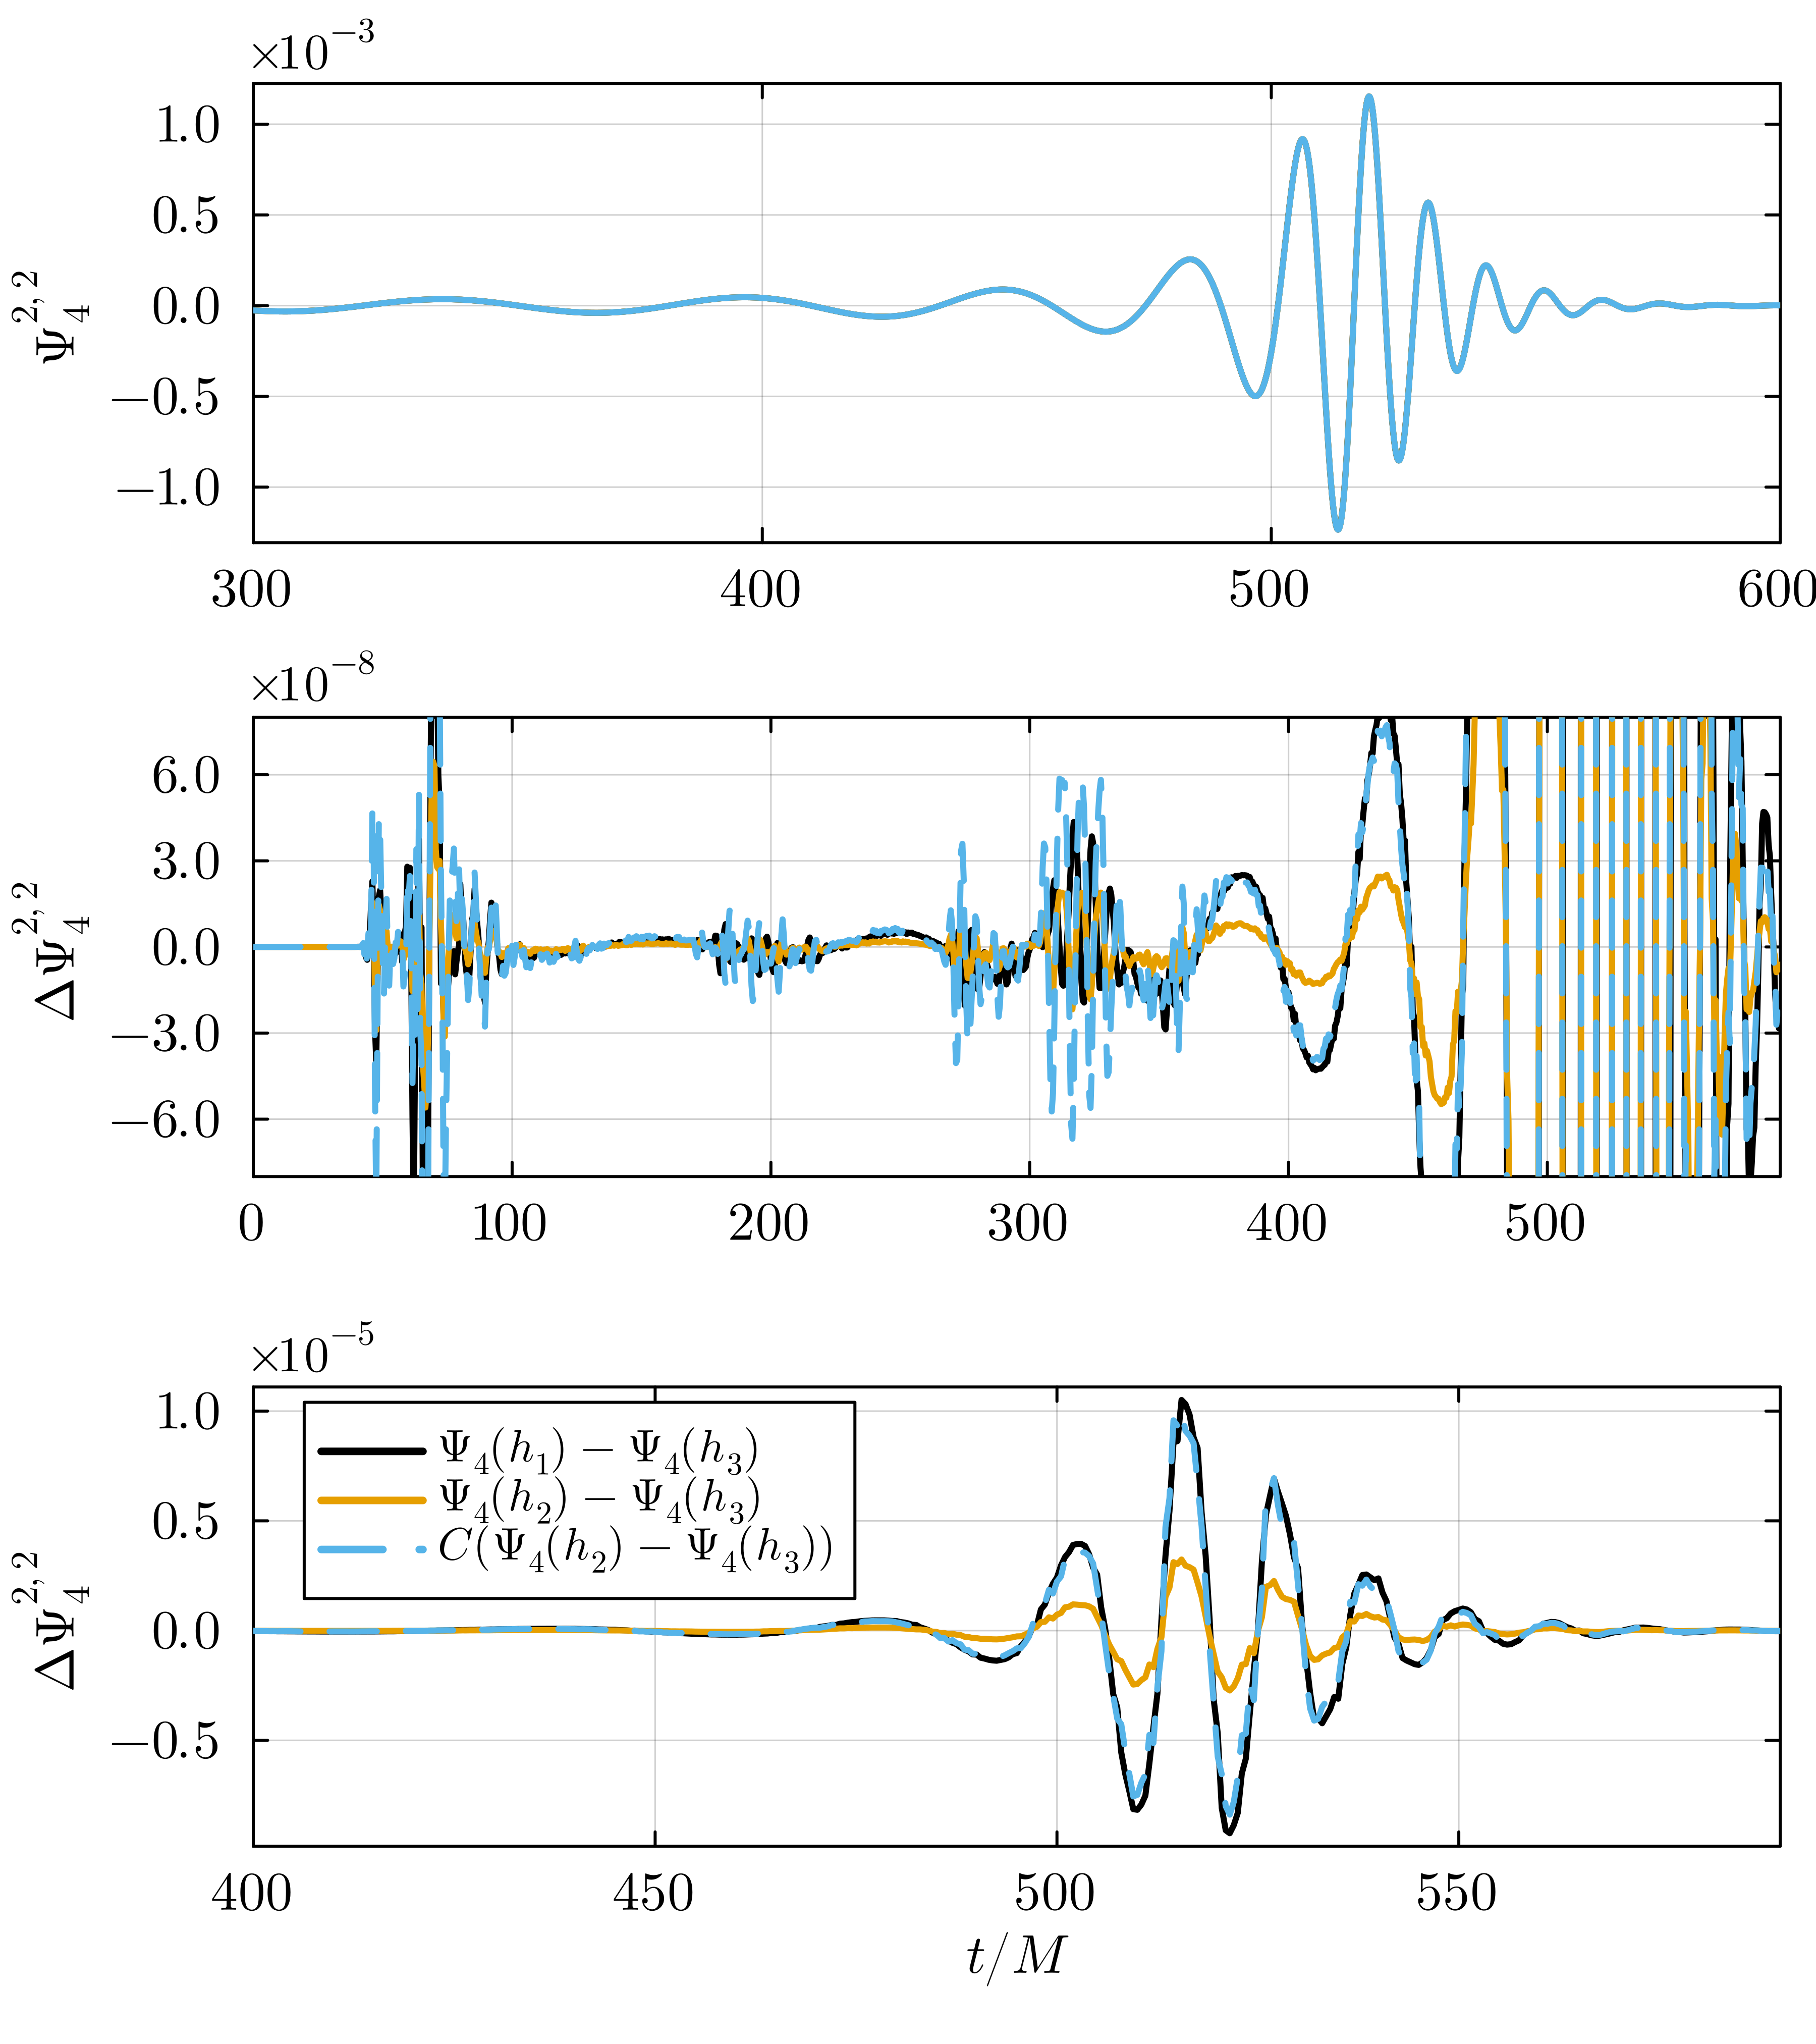

In [2]:
# Convergence factor
factor(order) = (1 - (1/1.44)^order) / ((1/1.2)^order - (1/1.44)^order)

# Plot
let dirs = [
        ("q1-Z4cow-low/Sum/mp_Psi4_l2_m2_r60.00.tsv", "low"),
        ("q1-Z4cow-med/Sum/mp_Psi4_l2_m2_r60.00.tsv", "med"),
        ("q1-Z4cow-high/Sum/mp_Psi4_l2_m2_r60.00.tsv", "high"),
    ]
    (dats, labs) = MiscTSV.load_data_0d(dirs; cols=[1,2], parent_dir="../../data/q1")
    # Interpolate
    itps = []
    for dat in dats
        push!(itps, linear_interpolation(dat[1], dat[2]))
    end
    
    ##########
    # Plot 1 #
    ##########
    plt1 = plot()
    xs = [300, 400, 500, 600]
    xticks!(plt1, xs, [L"%$(n)" for n in xs])
    for i in 1:length(dats)
        d = dats[i]
        plt1 = plot!(d[1], d[2], label="",
                     titlefontsize=14,
                     guidefontsize=12,
                     tickfontsize=12,
                     legendfontsize=10,
                     linewidth=2)
    end
    plt1 = plot!(xlims=(300, 600), ylabel=L"\Psi_4^{2,2}", framestyle=:box)
    plt1 = plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e3, digits=1))"), topmargin=0.5cm)
    plt1 = annotate!(300, maximum(dats[1][2])*1.25, Plots.text(L"\times10^{-3}", 11, :black, :left))
    #display(plt1)
    
    ##########
    # Plot 2 #
    ##########
    x0 = 0:0.5:600
    f_low_high = itps[1].(x0) - itps[3].(x0)
    f_med_high = itps[2].(x0) - itps[3].(x0)
    plt2 = plot()
    xs = [400, 450, 500, 550]
    xticks!(plt2, xs, [L"%$(n)" for n in xs])
    plt2 = plot!(x0, (f_low_high), label=L"\Psi_4(h_1)-\Psi_4(h_3)", linewidth=2)
    plt2 = plot!(x0, (f_med_high), label=L"\Psi_4(h_2)-\Psi_4(h_3)", linewidth=2)
    plt2 = plot!(x0, (f_med_high) * factor(4),
                 label=L"C(\Psi_4(h_2)-\Psi_4(h_3))", linewidth=2, linestyle=:dash)
    plt2 = plot!(titlefontsize=14,
                 guidefontsize=12,
                 tickfontsize=12,
                 legendfontsize=10)
    plt2 = plot!(xlim=(400,590), xlabel=L"t/M", ylabel=L"\Delta\Psi_4^{2,2}",
                 framestyle=:box, legend=:topleft)
    plt2 = plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e5, digits=1))"), topmargin=0.5cm)
    plt2 = annotate!(400, maximum(f_low_high)*1.23, Plots.text(L"\times10^{-5}", 11, :black, :left))
    #display(plt2)
    
    ##########
    # Plot 3 #
    ##########
    plt3 = plot()
    xs = 0:100:500
    xticks!(plt3, xs, [L"%$(n)" for n in xs])
    plt3 = plot!(x0, (f_low_high), label="", linewidth=2)
    plt3 = plot!(x0, (f_med_high), label="", linewidth=2)
    plt3 = plot!(x0, (f_med_high) * factor(4),
                 label="", linewidth=2, linestyle=:dash)
    plt3 = plot!(titlefontsize=14,
                 guidefontsize=12,
                 tickfontsize=12,
                 legendfontsize=10)
    plt3 = plot!(xlim=(0,590), ylim=(-8e-8,8e-8), ylabel=L"\Delta\Psi_4^{2,2}",
                 framestyle=:box, legend=:bottomleft)
    plt3 = plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e8, digits=1))"), topmargin=2mm)
    plt3 = annotate!(0, 8e-8*1.18, Plots.text(L"\times10^{-8}", 11, :black, :left))
    #display(plt3)
    
    ##########
    # In Sum #
    ##########
    plt = plot(plt1, plt3, plt2, layout=(3, 1), size = (600, 675), dpi=600)
    # savefig(plt, "GW-conv.pdf")
    display(plt)
end